In [1]:
import numpy as np
import cv2
import math
import itertools
import random
import matplotlib.pyplot as plt

In [2]:
path = "../../SemiF-AnnotationPipeline/data/semifield-developed-images/NC_2022-08-05/images/NC_1659702473.jpg"
img = cv2.imread(path)
img.shape


(6368, 9560, 3)

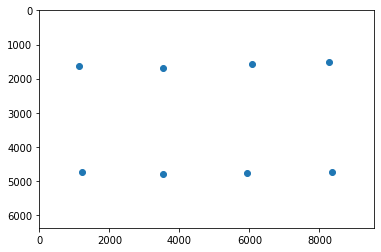

In [21]:
def rand_pot_grid(img_shape):
    """Creates a set of grid-like coordinates based on image size.
       The number of coordinates (pots) is based on randomely choosing
       the number rows and columns. Coordinates are evenly spaced both 
       vertically and horizontally based on image shape and number of 
       rows and columns. Zero coordinates are removed as are the maximum
       extent of the image (img.shape).

    Args:
        img_shape (tuple): shape of image

    Returns:
        coords: evenly spaced coordinates
    """
    
    imght, imgwid = img_shape[:2]
    
    rand_wid = random.randint(2,5)
    # rand_wid = 3
    rand_ht = random.choice([2,3])  
    # rand_ht = 2
    
    # Create width locations
    wid = np.linspace(0,imgwid, rand_wid, dtype=int)
    wid = wid[wid != 0]
    wid_diff = np.diff(wid)
    
    if len(wid_diff) >= 2:
        wid_diff = wid_diff[0]    
    wid = [(x - math.ceil(wid_diff/2)) if wid_diff != 0 else math.ceil(x/2) for x in wid] # Accounts for 0 diff
    
    # Create height locations
    ht = np.linspace(0, imght, rand_ht, dtype=int)
    ht_diff = np.diff(ht)[0]
    ht = ht[ht != imght]
    ht = [(x + int(ht_diff/2)) for x in ht]
    
    # Combine height and width to make coordinates
    coords = list(itertools.product(wid, ht))
    
    rand_x = 100 if rand_wid >= 4 else 600
    rand_y = 100 if (rand_ht == 3) and (rand_wid >=4) else 700
    coords = [(x + random.randint(-rand_x,rand_x), y + random.randint(-rand_y,rand_y)) for x, y in coords]
    return coords
    
imght, imgwid = img.shape[:2]
coords = rand_pot_grid(img.shape)
xx = [x for x, y in coords]
yy = [y for x, y in coords]
plt.scatter(xx,yy)  
plt.xlim((0,imgwid))
plt.ylim((imght, 0))
plt.show()